## Лабораторная работа 1

### Разработка корреляционного фильтра

In [1]:
import os
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from imageio import imread

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(os.path.join(folder,filename))
        img = imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [4]:
folder_path = "./data/"
images = load_images_from_folder(folder_path)

./data/boat2.png
./data/boat1.jpg


In [5]:
print(images[0].shape)
print(images[1].shape)

(1369, 2048)
(1291, 1972)


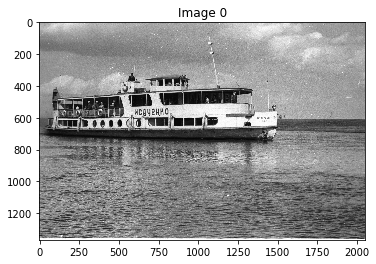

In [6]:
plt.imshow(images[0], cmap='gray')
plt.title('Image 0')
plt.show()

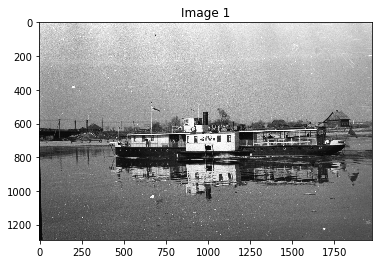

In [7]:
plt.imshow(images[1], cmap='gray')
plt.title('Image 1')
plt.show()

In [8]:
def convolve(img, fltr=np.ones((3, 3)), stride=1):
    '''
    img: 2D-numpy array for image representation
    fltr: 2D-numpy array for filter
    stride: int for 
    '''
    img_shape = np.array(img.shape) # getting input image shape
    filter_shape = np.array(fltr.shape) # getting filter shape

    out_shape = (img_shape - filter_shape)/stride + 1
    out_shape = out_shape.astype(int) # computing output image shape
    
    output = np.zeros(out_shape)
    
    left_x = 0 # starting point for image X axis
    coord_x = 0 # point in output matrix X axis
    while left_x <= (img_shape - filter_shape)[0]:
        left_y = 0 # starting point for Y axis
        coord_y = 0 # point in output matrix Y axis
        while left_y <= (img_shape - filter_shape)[1]:
            block = img[left_x:left_x + filter_shape[0], left_y:left_y + filter_shape[1]]
            output[left_x][left_y] = np.sum(block * fltr)
            left_y += stride
            coord_y
        left_x += stride

    return output.astype(int)

In [9]:
fltrs = {"Ones 9x9": np.ones((9, 9)),
         "Ones 16x16": np.ones((16, 16)),
       "Without center" : np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1,
                                     -1, -1, -1, -1, -1, -1, -1, -1, -1,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                     1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=np.float64).reshape((9, 9)),
        "With center" : np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1,
                                     -1, -1, -1, -1, -1, -1, -1, -1, -1,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 1, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     0, 0, 0, 0, 0, 0, 0, 0, 0,
                                     1, 1, 1, 1, 1, 1, 1, 1, 1,
                                     1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=np.float64).reshape((9, 9))
       }

In [10]:
for name in fltrs:
    fltrs[name] /= np.linalg.norm(fltrs[name])

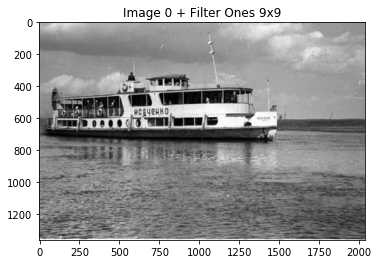

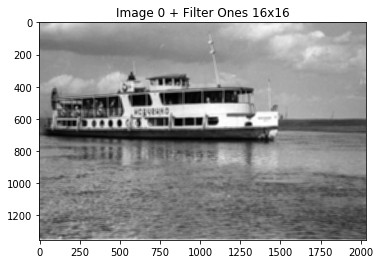

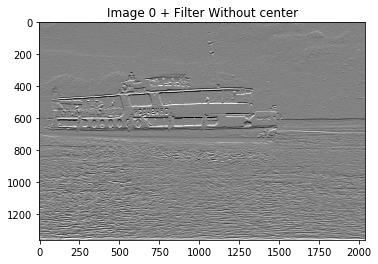

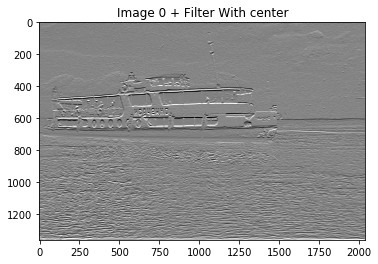

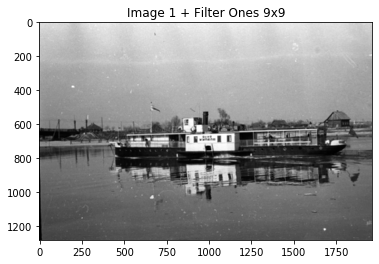

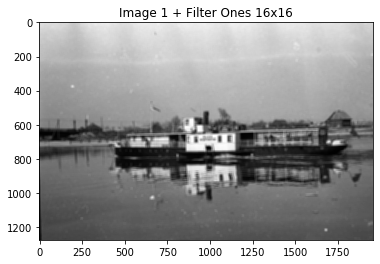

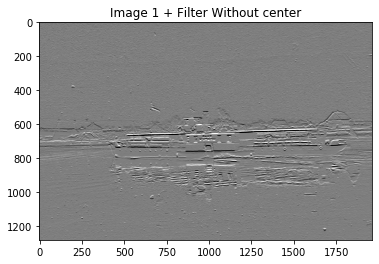

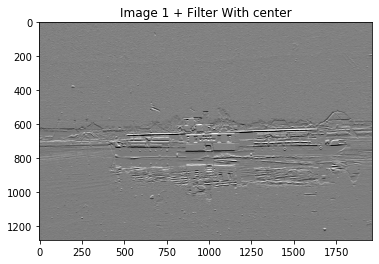

In [11]:
for idx, image in enumerate(images):
    for name in fltrs:
        processed_img = convolve(image, fltrs[name])
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Image {idx} + Filter {name}")
        plt.show()